# THE SALES DATA ANALYTICS

### This notebook analyzes the sales data to uncover insights and answer key business questions. 
### The analysis will focus on the following questions:
- What is the best month for sales? What amount was earned that month?
- What city had the highest number of sales?
- What time should we display advertisements to maximize the likelihood of customers buying products?
- What products are often sold together?
- What product was sold the most?

### importing necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
all_data = pd.read_csv("C:/users/hp/Downloads/all_data.csv")

In [5]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"


## exploring and updating dataframe

In [6]:
all_data_reset = all_data.reset_index(drop=True)

all_data_reset.head()
all_data = all_data_reset
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [7]:
all_data_cleaned = all_data.dropna(how='all')
all_data_cleaned.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [8]:
all_data_cleaned.reset_index(drop=True, inplace=True)
all_data = all_data_cleaned
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### adding a month column

In [9]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')
all_data = all_data.dropna(subset=['Quantity Ordered'])
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)

In [10]:
all_data.reset_index(drop=True, inplace=True)

In [11]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'],infer_datetime_format=True)

In [12]:
all_data['Month'] = all_data['Order Date'].dt.month

In [13]:
all_data.reset_index(drop=True, inplace=True)

In [14]:
all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
185945,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9
185946,259354,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9
185947,259355,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9
185948,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9
185949,259357,USB-C Charging Cable,1,11.95,2019-09-30 00:18:00,"250 Meadow St, San Francisco, CA 94016",9


## adding a sales column

In [15]:
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')


non_numeric_count = all_data['Price Each'].isna().sum()

print(f"The number of non-numeric values in 'Price Each': {non_numeric_count}")

The number of non-numeric values in 'Price Each': 0


In [16]:
all_data["Sales"] = all_data["Quantity Ordered"]* all_data["Price Each"]

In [17]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


## 1. Determining the best month for sales, amount earned that month.

In [18]:
results = all_data.groupby('Month').sum('Sales')
months = range(1,13)
results.head(12)

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


<BarContainer object of 12 artists>

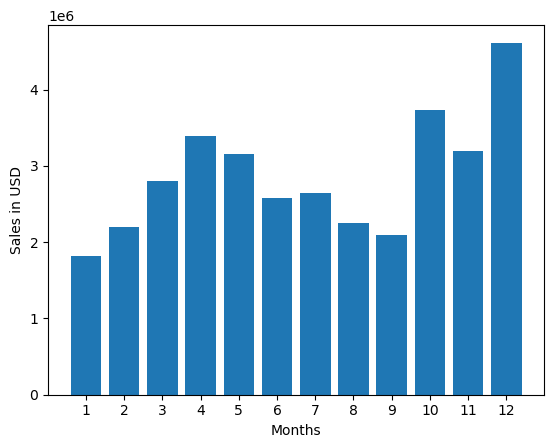

In [19]:
plt.xticks(months)
plt.ylabel("Sales in USD x 10^6")
plt.xlabel('Months')
plt.bar(months, results['Sales'])


#### In this graph, December (Month 12) has the highest bar. This indicates that December is the best month for sales.
#### December is the best month for sales, with total sales amounting to approximately $4.6 million

### 2. What city had the highest number of sales?

In [20]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]
all_data["City"] = all_data["Purchase Address"].apply(lambda x:get_city(x) + ' ' + get_state(x))

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [21]:
results1 = all_data.groupby('City').sum('Sales')

In [22]:
results1

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58
Austin TX,11153,1809873.61,69829,1819581.75
Boston MA,22528,3637409.77,141112,3661642.01
Dallas TX,16730,2752627.82,104620,2767975.40
Los Angeles CA,33289,5421435.23,208325,5452570.80
New York City NY,27932,4635370.83,175741,4664317.43
Portland ME,2750,447189.25,17144,449758.27
Portland OR,11303,1860558.22,70621,1870732.34
San Francisco CA,50239,8211461.74,315520,8262203.91


In [25]:
results1["Cities"] = results1.index

In [26]:
results1

,Quantity Ordered,Price Each,Month,Sales,Cities
City,,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58,Atlanta GA
Austin TX,11153,1809873.61,69829,1819581.75,Austin TX
Boston MA,22528,3637409.77,141112,3661642.01,Boston MA
Dallas TX,16730,2752627.82,104620,2767975.40,Dallas TX
Los Angeles CA,33289,5421435.23,208325,5452570.80,Los Angeles CA
New York City NY,27932,4635370.83,175741,4664317.43,New York City NY
Portland ME,2750,447189.25,17144,449758.27,Portland ME
Portland OR,11303,1860558.22,70621,1870732.34,Portland OR
San Francisco CA,50239,8211461.74,315520,8262203.91,San Francisco CA


<BarContainer object of 10 artists>

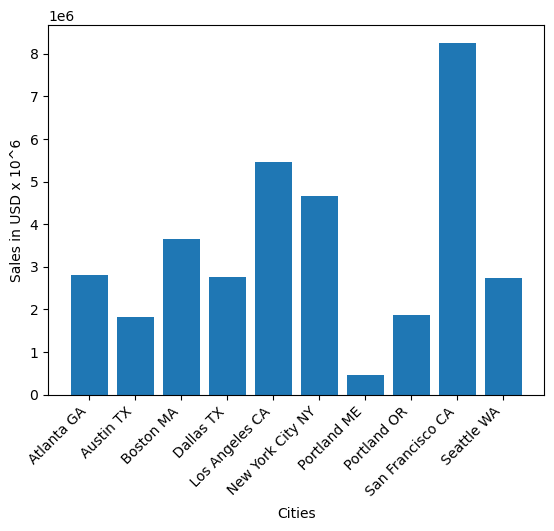

In [27]:
plt.xticks(rotation=45, ha='right')
plt.ylabel("Sales in USD x 10^6")
plt.xlabel("Cities")
plt.bar(results1["Cities"], results1["Sales"])

####  Seattle, WA has the tallest bar, which indicates that Seattle had the highest number of sales.
#### Seattle, WA, had the highest number of sales, with total sales amounting to approximately $8.2 million.

### 3. What time should we display advertisements to maximize likelihoods of customers buying product?

In [28]:
all_data["Hour"] = all_data["Order Date"].dt.hour

In [29]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9


In [30]:
results2 = all_data.groupby(["Hour"]).sum("Sales")

In [31]:
results2

,Quantity Ordered,Price Each,Month,Sales
Hour,,,,
0,4428,709296.70,27554,713721.27
1,2619,458490.00,16657,460866.88
2,1398,233833.64,8507,234851.44
3,928,144726.42,5904,145757.89
4,937,162058.18,6148,162661.01
5,1493,229621.21,9301,230679.82
6,2810,445000.11,17539,448113.00
7,4556,740568.11,28850,744854.12
8,7002,1185970.62,43626,1192348.97


In [32]:
results2["Hours"] = results2.index

In [33]:
results2

,Quantity Ordered,Price Each,Month,Sales,Hours
Hour,,,,,
0,4428,709296.70,27554,713721.27,0
1,2619,458490.00,16657,460866.88,1
2,1398,233833.64,8507,234851.44,2
3,928,144726.42,5904,145757.89,3
4,937,162058.18,6148,162661.01,4
5,1493,229621.21,9301,230679.82,5
6,2810,445000.11,17539,448113.00,6
7,4556,740568.11,28850,744854.12,7
8,7002,1185970.62,43626,1192348.97,8


Text(0.5, 0, 'Hours')

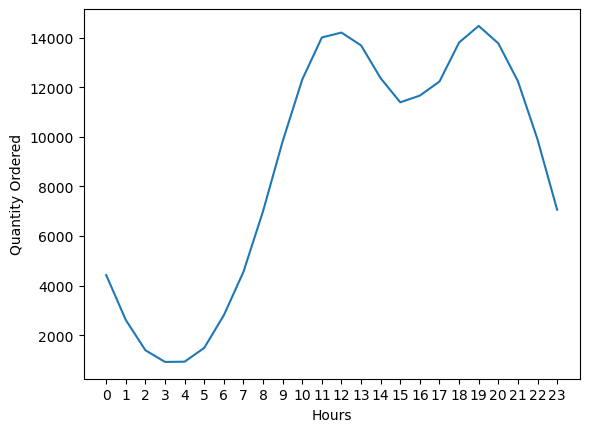

In [34]:

plt.plot(results2["Hours"], results2["Quantity Ordered"])
plt.xticks(results2["Hours"])
plt.ylabel("Quantity Ordered")
plt.xlabel("Hours")

#### The graph shows that the number of orders starts to increase significantly from around 10 AM and peaks between 11 AM to 7 PM.

#### The best time to display advertisements is between 11 AM and 7 PM, as this is when the highest number of purchases are made

### 4. What products are often sold together?

In [39]:
products_sold_together = all_data[all_data['Order ID'].duplicated(keep=False)]

In [52]:
products_sold_together.head(6)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11


In [53]:
products_sold_together['Sold Together']=products_sold_together.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [58]:
products_sold_together = products_sold_together[['Order ID', 'Sold Together']].drop_duplicates()

In [59]:
products_sold_together.head()

,Order ID,Sold Together
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [68]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in products_sold_together["Sold Together"]:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

#### iPhone and Lightning Charging Cable are the goods that are most often sold together compared to others

### 5. What product was sold the most?

In [90]:
products_ordered = all_data.groupby(["Product"]).sum(["Quantity Ordered"])

In [91]:
products_ordered

,Quantity Ordered,Price Each,Month,Sales,Hour
Product,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815


In [92]:
products_ordered = products_ordered.reset_index()

In [93]:
products_ordered

,Product,Quantity Ordered,Price Each,Month,Sales,Hour
0,20in Monitor,4129,451068.99,29336,454148.71,58764
1,27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916
2,27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540
3,34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076
4,AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342
5,AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332
6,Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304
7,Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445
8,Flatscreen TV,4819,1440000.00,34224,1445700.00,68815
9,Google Phone,5532,3315000.00,38305,3319200.00,79479


Text(0.5, 0, 'Product')

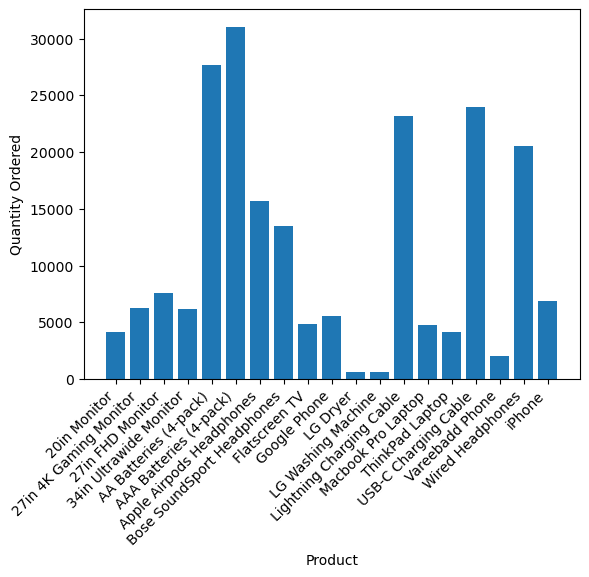

In [104]:
plt.xticks(rotation=45, ha='right')
plt.bar(products_ordered["Product"], products_ordered["Quantity Ordered"])
plt.ylabel("Quantity Ordered")
plt.xlabel("Product")

### AAA Batteries(4 Pack) is the product that has been sold the most with over 30,000 quantity ordered